In [7]:
import pandas as pd
import glob

# Adjust the path according to your folder structure
data_path = "C:/Users/ayalab/Box/Chimp-ML/Caleb/02_processed_data/*.csv"

# List all CSV files in the directory
csv_files = glob.glob(data_path)

# Read each CSV file into a DataFrame and append it to a list
dataframes = [pd.read_csv(f) for f in csv_files]

# Concatenate all DataFrames into a single DataFrame
# data = pd.concat(dataframes, ignore_index=True)


In [8]:
# check first df in the dataframes list
print(dataframes[0].head()) 

   track  frame_idx  instance.score      L_eye.x     L_eye.y  L_eye.score  \
0    NaN          0             NaN  1046.527609  348.099708          NaN   
1    NaN          1        0.692039  1036.423096  348.151672     1.014141   
2    NaN          2        0.696990  1032.468628  348.761902     1.041474   
3    NaN          3        0.699482  1032.504395  349.148773     1.035257   
4    NaN          4        0.710774  1032.985474  352.052948     1.018405   

      L_brow.x    L_brow.y  L_brow.score       nose.x  ...  chin.score  \
0  1044.881868  306.310065           NaN  1078.033554  ...         NaN   
1  1036.236450  304.563568      1.046830  1069.014526  ...    0.737566   
2  1032.216309  304.969391      1.041452  1064.924927  ...    0.760247   
3  1032.259766  308.290985      1.031554  1064.940430  ...    0.824881   
4  1032.689087  308.196686      1.027203  1068.218750  ...    0.831806   

   center_eye.x  center_eye.y  center_eye.score  center_brow.x  center_brow.y  \
0   1030.84

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming dataframes[0] is your DataFrame
data = dataframes[0]

# Check the DataFrame's shape before dropping NaN
print("Original shape:", data.shape)

# Data Cleaning: Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check the shape after selecting numeric columns
print("Shape after selecting numeric columns:", numeric_data.shape)

# Drop rows with NaN and check the shape
numeric_data = numeric_data.dropna()
print("Shape after dropping NaN values:", numeric_data.shape)

# If numeric_data is not empty, proceed with the rest of the analysis
if not numeric_data.empty:
    # Data Selection
    feature_columns = [col for col in numeric_data.columns if col.endswith('.x') or col.endswith('.y')]
    features = numeric_data[feature_columns]

    # Data Scaling: Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Continue with UMAP analysis...
else:
    print("The DataFrame is empty after preprocessing steps.")


Original shape: (357, 39)
Shape after selecting numeric columns: (357, 39)
Shape after dropping NaN values: (0, 39)
The DataFrame is empty after preprocessing steps.


In [12]:
# Assuming 'data' is your DataFrame with body points and potential NaNs

# Create mask columns for each body point
for col in data.columns:
    if col.endswith('.x') or col.endswith('.y'):
        mask_col = col + '_mask'
        data[mask_col] = ~data[col].isna()

# Replace NaNs in coordinate columns with a placeholder value
placeholder_value = -999  # Example placeholder, adjust as needed
data.fillna(placeholder_value, inplace=True)

# Now 'data' includes both the coordinates and the mask information


In [13]:
print(data.head()) 

   track  frame_idx  instance.score      L_eye.x     L_eye.y  L_eye.score  \
0 -999.0          0     -999.000000  1046.527609  348.099708  -999.000000   
1 -999.0          1        0.692039  1036.423096  348.151672     1.014141   
2 -999.0          2        0.696990  1032.468628  348.761902     1.041474   
3 -999.0          3        0.699482  1032.504395  349.148773     1.035257   
4 -999.0          4        0.710774  1032.985474  352.052948     1.018405   

      L_brow.x    L_brow.y  L_brow.score       nose.x  ...  \
0  1044.881868  306.310065   -999.000000  1078.033554  ...   
1  1036.236450  304.563568      1.046830  1069.014526  ...   
2  1032.216309  304.969391      1.041452  1064.924927  ...   
3  1032.259766  308.290985      1.031554  1064.940430  ...   
4  1032.689087  308.196686      1.027203  1068.218750  ...   

   center_lip_top.x_mask  center_lip_top.y_mask  chin.x_mask  chin.y_mask  \
0                   True                   True         True         True   
1         

C:\Users\ayalab\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\ayalab\AppData\Local\Temp\ipykernel_1352\48719526.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, cmap='Spectral')


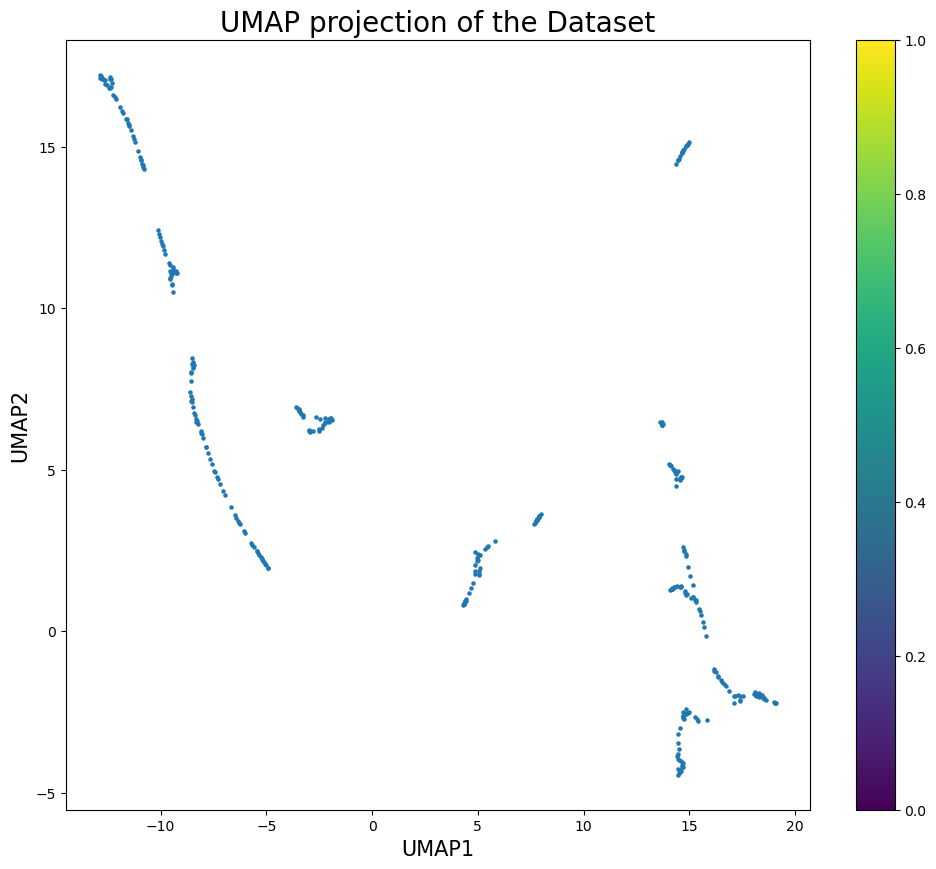

In [14]:
import umap
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after preprocessing

# Select the relevant features (coordinates and mask columns)
features = data.filter(regex='.x$|.y$|_mask$')  # Adjust this regex to match your column naming

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize and fit UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Plotting the UMAP results
plt.figure(figsize=(12, 10))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, cmap='Spectral')
plt.title('UMAP projection of the Dataset', fontsize=20)
plt.xlabel('UMAP1', fontsize=15)
plt.ylabel('UMAP2', fontsize=15)
plt.colorbar()
plt.show()
